In [5]:
import os
import pandas as pd
from data_preparation import kmer

# chr8,FAM66E.csv,53743
gene_path = os.path.join("data", "gene_dir", "chr8", "FAM66E.csv")
gene_df = pd.read_csv(gene_path)

seq_chunks = []
lab_chunks = []
for i, r in gene_df.iterrows():
    sequence = r["sequence"]
    seq_kmer = kmer(sequence, 3, 1)
    arr_seq_kmer = kmer(seq_kmer, 510, 510)
    arr_seq_kmer = [" ".join(x) for x in arr_seq_kmer]
    label = r["label"]
    lab_kmer = kmer(label, 3, 1)
    arr_lab_kmer = kmer(lab_kmer, 510, 510)
    arr_lab_kmer = [" ".join(x) for x in arr_lab_kmer]
    for x, y in zip(arr_seq_kmer, arr_lab_kmer):
        seq_chunks.append(x)
        lab_chunks.append(y)

data = {
    "sequence": seq_chunks,
    "label": lab_chunks
}
pd.DataFrame(data=data).to_csv(
    os.path.join("test_data", "FAM66E.csv"),
    index=False
)


100%|██████████| 106/106 [00:00<00:00, 1518.54it/s]


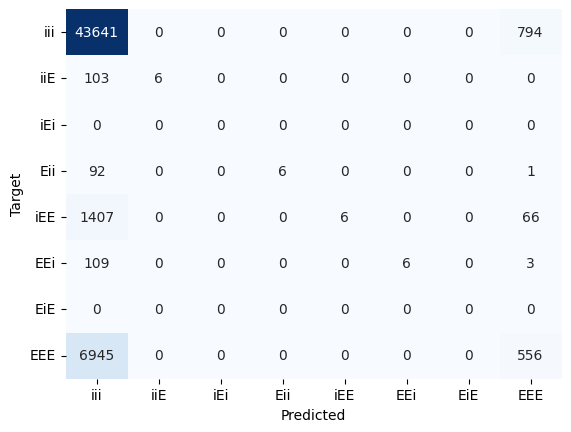

In [17]:
# Viz.
import pandas as pd
import os
from utils.metrics import Metrics, cleanup_prediction
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from utils.seqlab import Index_Dictionary

labels = [Index_Dictionary[i] for i in range(8)]
log_path = os.path.join("test_data", "FAM66E", "prediction_log", "37kestys.csv")
log_df = pd.read_csv(log_path)
clean_prediction = []
clean_target = []
for i, r in tqdm(log_df.iterrows(), total=log_df.shape[0]):
    prediction = r["prediction"].split(" ")
    prediction = [int(x) for x in prediction]
    target = r["target"].split(" ")
    target = [int(x) for x in target]

    cp, ct = cleanup_prediction(prediction, target)
    _pred_size = len(ct)
    _target_size = len(ct)
    if  not _pred_size == _target_size:
        print(cp)
        print(ct)
    clean_prediction += cp
    clean_target += ct

cf_matrix = confusion_matrix(
            clean_target,
            clean_prediction,
            labels=[labidx for labidx in range(8)]
        )
ax = sns.heatmap(cf_matrix.transpose(), annot=True, cmap="Blues", fmt='d', xticklabels=labels, yticklabels=labels, cbar=False)
ax.set(xlabel="Predicted", ylabel="Target")
ax.set_yticklabels(labels, rotation=0, ha="right")

plt.show()